In [16]:
import pandas as pd
import glob
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display
import numpy as np

def open_csv_conc(pattern, exclude_pattern):
    csv_files = glob.glob(pattern)
    print(f"Archivos encontrados: {csv_files}")
    csv_files = [file for file in csv_files if exclude_pattern not in file]
    print(f"Archivos después de excluir '{exclude_pattern}': {csv_files}")

    if not csv_files:
        raise ValueError("No se encontraron archivos que coincidan con el patrón y no sean excluidos.")

    dfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df

# Cargar datos
try:
    df_splus_wise = open_csv_conc("../Class_wise_main_unique/*.csv", "simbad")
    print("Número de objetos solo con colores SPLUS+WISE:", len(df_splus_wise))
except ValueError as e:
    print(e)

if 'df_splus_wise' in locals():
    specific_pairs = [
        (('W2mag', 'r_PStotal'), ('J0378_PStotal', 'J0430_PStotal')),
        (('J0395_PStotal', 'J0430_PStotal'), ('W2mag', 'i_PStotal')),
        (('i_PStotal', 'z_PStotal'), ('W2mag', 'z_PStotal')),
        (('u_PStotal', 'J0430_PStotal'), ('W1mag', 'W2mag')),
        (('g_PStotal', 'u_PStotal'), ('W1mag', 'i_PStotal')),
        (('W2mag', 'g_PStotal'), ('g_PStotal', 'J0378_PStotal')),
        (('J0430_PStotal', 'J0515_PStotal'), ('i_PStotal', 'J0861_PStotal')),
        (('W1mag', 'z_PStotal'), ('z_PStotal', 'J0660_PStotal')),
        (('W1mag', 'r_PStotal'), ('r_PStotal', 'J0378_PStotal'))
    ]

    fig = make_subplots(rows=3, cols=3, subplot_titles=[f"Plot {i+1}" for i in range(len(specific_pairs))])

    num_colors = len(df_splus_wise["Label"].unique())
    colors = px.colors.qualitative.Plotly

    for i, ((x1, y1), (x2, y2)) in enumerate(specific_pairs):
        row = i // 3 + 1
        col = i % 3 + 1

        # Agregar puntos de fondo aleatorios
        x_background = np.random.uniform(df_splus_wise[x1].min() - df_splus_wise[y1].max(), df_splus_wise[x1].max() - df_splus_wise[y1].min(), size=6000)
        y_background = np.random.uniform(df_splus_wise[x2].min() - df_splus_wise[y2].max(), df_splus_wise[x2].max() - df_splus_wise[y2].min(), size=6000)

        fig.add_trace(
            go.Scatter(
                x=x_background,
                y=y_background,
                mode='markers',
                marker=dict(color='rgba(200,200,200,0.5)', size=6),
                showlegend=False
            ),
            row=row, col=col
        )

        for label, group_data in df_splus_wise.groupby("Label"):
            legend_label = "Noise" if label == -1 else f"Group {label}"
            color = colors[label % num_colors]

            fig.add_trace(
                go.Scatter(
                    x=group_data[x1] - group_data[y1],
                    y=group_data[x2] - group_data[y2],
                    mode='markers',
                    marker=dict(color=color, size=6, line=dict(width=1)),
                    name=legend_label,
                    showlegend=(i == 0)
                ),
                row=row, col=col
            )

        fig.update_xaxes(title_text=f"{x1.replace('_PStotal', '')} - {y1.replace('_PStotal', '')}", row=row, col=col)
        fig.update_yaxes(title_text=f"{x2.replace('_PStotal', '')} - {y2.replace('_PStotal', '')}", row=row, col=col)

    fig.update_layout(
        height=1000, width=1000,
        title_text="Color-Color Diagrams",
        showlegend=True,
        legend=dict(yanchor="top", y=-0.2, xanchor="center", x=0.5)
    )
    
    # Widgets para mostrar y copiar las coordenadas
    coords_label = widgets.Label()
    coords_textarea = widgets.Textarea(
        value='',
        placeholder='Haz clic en un punto para ver las coordenadas',
        description='Coordenadas:',
        disabled=False,
        layout=widgets.Layout(width='100%')
    )
    display(coords_label, coords_textarea)

    def display_coordinates(trace, points, selector):
        if points.point_inds:
            x = points.xs[0]
            y = points.ys[0]
            coords_label.value = f"Clicked coordinates: x={x:.2f}, y={y:.2f}"
            coords_textarea.value += f"x={x:.2f}, y={y:.2f}\n"

    fig_widget = go.FigureWidget(fig)

    # Adjuntar el evento de clic a cada traza del gráfico
    for trace in fig_widget.data:
        trace.on_click(display_coordinates)
    
    display(fig_widget)

Archivos encontrados: ['../Class_wise_main_unique/Halpha_emitter_wise_group0-simbad.csv', '../Class_wise_main_unique/Halpha_emitter_wise_group0.csv', '../Class_wise_main_unique/Halpha_emitter_wise_group1-simbad.csv', '../Class_wise_main_unique/Halpha_emitter_wise_group1.csv', '../Class_wise_main_unique/Halpha_emitter_wise_group2-simbad.csv', '../Class_wise_main_unique/Halpha_emitter_wise_group2.csv', '../Class_wise_main_unique/Halpha_emitter_wise_group3-simbad.csv', '../Class_wise_main_unique/Halpha_emitter_wise_group3.csv', '../Class_wise_main_unique/Halpha_emitter_wise_group4-simbad.csv', '../Class_wise_main_unique/Halpha_emitter_wise_group4.csv', '../Class_wise_main_unique/Halpha_emitter_wise_noise.csv']
Archivos después de excluir 'simbad': ['../Class_wise_main_unique/Halpha_emitter_wise_group0.csv', '../Class_wise_main_unique/Halpha_emitter_wise_group1.csv', '../Class_wise_main_unique/Halpha_emitter_wise_group2.csv', '../Class_wise_main_unique/Halpha_emitter_wise_group3.csv', '../

Label(value='')

Textarea(value='', description='Coordenadas:', layout=Layout(width='100%'), placeholder='Haz clic en un punto …

FigureWidget({
    'data': [{'marker': {'color': 'rgba(200,200,200,0.5)', 'size': 6},
              'mode': 'markers',
              'showlegend': False,
              'type': 'scatter',
              'uid': '0f0391f6-e50e-4db2-be64-1d2ebc367a13',
              'x': array([-8.65719756, -6.79755467,  2.36767335, ..., -6.29640206, -1.98340334,
                           2.06872349]),
              'xaxis': 'x',
              'y': array([ 3.61654031, -3.21856122,  6.35799489, ..., -2.64693354, -3.59644486,
                          -5.77302194]),
              'yaxis': 'y'},
             {'marker': {'color': '#19D3F3', 'line': {'width': 1}, 'size': 6},
              'mode': 'markers',
              'name': 'Noise',
              'showlegend': True,
              'type': 'scatter',
              'uid': '24faa5a4-c80b-488c-8c79-dc787ce30abc',
              'x': array([-4.962996]),
              'xaxis': 'x',
              'y': array([0.381606]),
              'yaxis': 'y'},
             {'m

Plot 1 -> class 0: (-4.71,2.08) (-0.25,-0.85); (-0.21, 0.59) (-2.16, -0.34)



           

                   

In [19]:
import ipywidgets as widgets
from IPython.display import display, HTML
import pandas as pd

# Función para calcular pendiente e intersección
def calculate_slope_and_intercept(x1, y1, x2, y2):
    if x1 == x2:
        raise ValueError("Las coordenadas x no pueden ser iguales; la línea sería vertical y la pendiente indefinida.")
    slope = (y2 - y1) / (x2 - x1)
    intercept = y1 - slope * x1
    return slope, intercept

# Función para calcular pendiente e intersección para pares de puntos específicos
def calculate_specific_pairs(pairs):
    results = []
    for (x1, y1), (x2, y2) in pairs:
        slope, intercept = calculate_slope_and_intercept(x1, y1, x2, y2)
        results.append({'Punto 1': (x1, y1), 'Punto 2': (x2, y2), 'Pendiente': slope, 'Intersección': intercept})
    return pd.DataFrame(results)

# Función para validar y analizar las coordenadas de entrada
def parse_coordinates(coord_str):
    try:
        pair_strings = coord_str.split(';')
        pairs = []
        for pair_str in pair_strings:
            points = pair_str.split()
            if len(points) != 2:
                raise ValueError(f"Formato inválido para el par de puntos: '{pair_str}'. Debe contener exactamente dos puntos.")
            point1 = tuple(map(float, points[0].strip('()').split(',')))
            point2 = tuple(map(float, points[1].strip('()').split(',')))
            pairs.append((point1, point2))
        return pairs
    except ValueError as e:
        raise ValueError(f"Error al convertir coordenadas: {e}")

# Interfaz interactiva
coords_text = widgets.Textarea(
    value='',
    placeholder='Ingresa pares de puntos en el formato (x1,y1) (x2,y2); (x3,y3) (x4,y4); ...',
    description='Coordenadas:',
    layout=widgets.Layout(width='100%', height='100px')
)

output = widgets.Output()

def on_button_clicked(b):
    with output:
        output.clear_output()
        try:
            pairs = parse_coordinates(coords_text.value)
            results_df = calculate_specific_pairs(pairs)
            display(HTML(results_df.to_html(index=False)))
        except Exception as e:
            print(f"Error: {e}")

calculate_button = widgets.Button(description="Calcular")
calculate_button.on_click(on_button_clicked)

display(coords_text, calculate_button, output)

Textarea(value='', description='Coordenadas:', layout=Layout(height='100px', width='100%'), placeholder='Ingre…

Button(description='Calcular', style=ButtonStyle())

Output()

Number of objects just with SPLUS+WISE colors: 1910


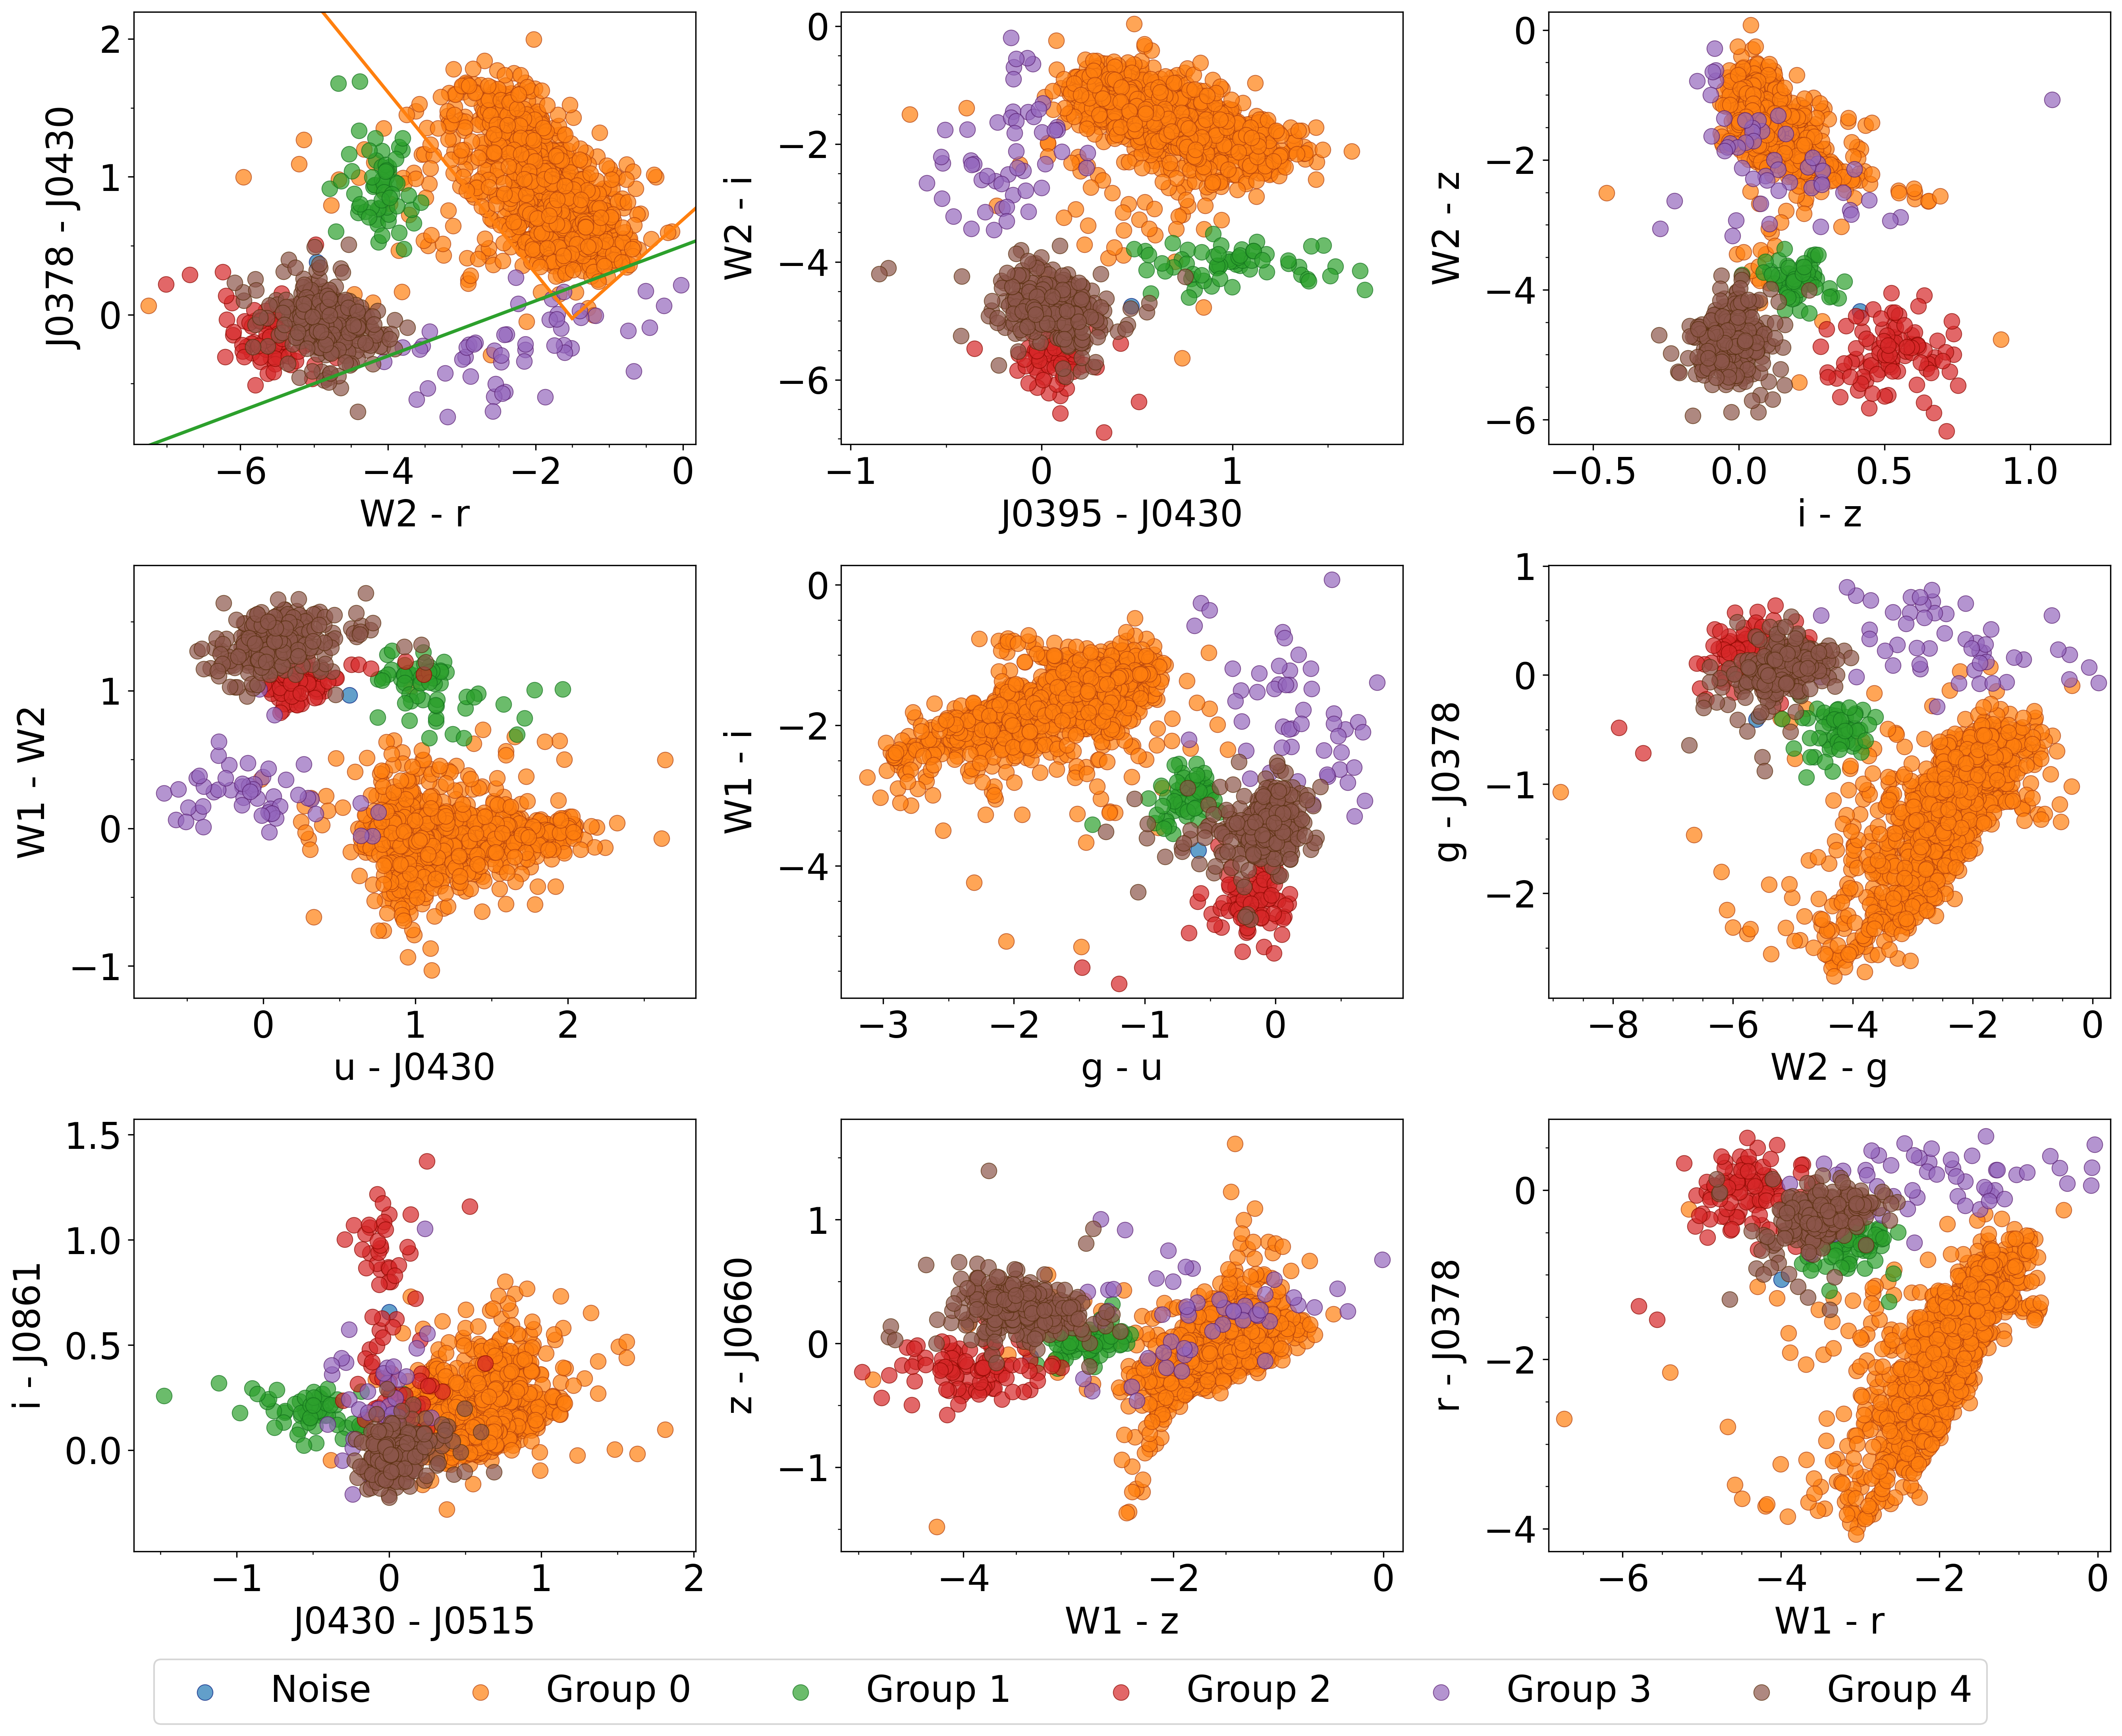

In [22]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, NullFormatter
import seaborn as sns

def open_csv_conc(pattern, exclude_pattern):
    csv_files = glob.glob(pattern)
    csv_files = [file for file in csv_files if exclude_pattern not in file]
    dfs = []

    for file in csv_files:
        df = pd.read_csv(file)
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df

def find_intersection(m1, b1, m2, b2):
    x_intersect = (b2 - b1) / (m1 - m2)
    y_intersect = m1 * x_intersect + b1
    return x_intersect, y_intersect

def add_custom_cut_lines(ax, m1, b1, m2, b2, color):
    x_intersect, y_intersect = find_intersection(m1, b1, m2, b2)
    x_range1 = np.linspace(ax.get_xlim()[0], x_intersect, 200)
    y_range1 = m1 * x_range1 + b1
    x_range2 = np.linspace(x_intersect, ax.get_xlim()[1], 200)
    y_range2 = m2 * x_range2 + b2
    ax.plot(x_range1, y_range1, color=color, linestyle='-', linewidth=2)
    ax.plot(x_range2, y_range2, color=color, linestyle='-', linewidth=2)
    # Remove the scatter point at the intersection
    # ax.scatter([x_intersect], [y_intersect], color=color, s=50, zorder=5)

# Load data
df_splus_wise = open_csv_conc("../Class_wise_main_unique/*.csv", "simbad")

print("Number of objects just with SPLUS+WISE colors:", len(df_splus_wise))

# Select specific pairs based on domain knowledge or preliminary analysis
specific_pairs = [
    (('W2mag', 'r_PStotal'), ('J0378_PStotal', 'J0430_PStotal')),
    (('J0395_PStotal', 'J0430_PStotal'), ('W2mag', 'i_PStotal')),
    (('i_PStotal', 'z_PStotal'), ('W2mag', 'z_PStotal')),
    (('u_PStotal', 'J0430_PStotal'), ('W1mag', 'W2mag')),
    (('g_PStotal', 'u_PStotal'), ('W1mag', 'i_PStotal')),
    (('W2mag', 'g_PStotal'), ('g_PStotal', 'J0378_PStotal')),
    (('J0430_PStotal', 'J0515_PStotal'), ('i_PStotal', 'J0861_PStotal')),
    (('W1mag', 'z_PStotal'), ('z_PStotal', 'J0660_PStotal')),
    (('W1mag', 'r_PStotal'), ('r_PStotal', 'J0378_PStotal'))
]

# Define custom cut lines for each class and each plot
custom_cut_lines = {
    0: {
        0: [(-0.656951, -1.014238), (0.476923, 0.690154)], # Example values for class 0, plot 0
        1: [(0.3, 1.2), (-0.7, 2.8)], # Example values for class 0, plot 1
        # Add more plots here
    },
    1: {
        0: [(0.2, 0.5), (-0.8, 2.5)], # Example values for class 1, plot 0
        1: [(0.4, 0.9), (-1.2, 3.2)], # Example values for class 1, plot 1
        # Add more plots here
    },
    # Add more classes here
}

# Create a figure with subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 14), dpi=300)
axes = axes.flatten()

# Define colors based on the number of labels
num_colors = len(df_splus_wise["Label"].unique())
colors = sns.color_palette("tab10", num_colors)
edge_colors = sns.color_palette("dark", num_colors)

# Plot each pair of color-color diagrams
for i, ((x1, y1), (x2, y2)) in enumerate(specific_pairs):
    ax = axes[i]

    all_x = []
    all_y = []
    points_per_class = []

    for group, (label, group_data) in enumerate(df_splus_wise.groupby("Label")):
        legend_label = "Noise" if label == -1 else f"Group {label}"
        color = colors[group % num_colors]
        edge_color = edge_colors[group % num_colors]
        marker = 'o'

        x_values = group_data[x1] - group_data[y1]
        y_values = group_data[x2] - group_data[y2]
        points = np.column_stack((x_values, y_values))
        points_per_class.append((points, color, label))
        all_x.extend(x_values)
        all_y.extend(y_values)

        ax.scatter(x_values, y_values,
                   c=[color], s=90, marker=marker, edgecolors=[edge_color], linewidth=0.5, label=legend_label, alpha=0.7)

    xlabel = x1.replace('_PStotal', '').replace('W1mag', 'W1').replace('W2mag', 'W2')
    ylabel = y1.replace('_PStotal', '').replace('W1mag', 'W1').replace('W2mag', 'W2')
    ax.set_xlabel(f"{xlabel} - {ylabel}", fontsize=22)

    xlabel = x2.replace('_PStotal', '').replace('W1mag', 'W1').replace('W2mag', 'W2')
    ylabel = y2.replace('_PStotal', '').replace('W1mag', 'W1').replace('W2mag', 'W2')
    ax.set_ylabel(f"{xlabel} - {ylabel}", fontsize=22, labelpad=10)

    ax.tick_params(axis='both', labelsize=22)
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.xaxis.set_minor_formatter(NullFormatter())
    ax.yaxis.set_minor_formatter(NullFormatter())

    ax.set_aspect('auto')

    # Calculate dynamic axis limits with a margin
    margin = 0.2
    x_min, x_max = min(all_x) - margin, max(all_x) + margin
    y_min, y_max = min(all_y) - margin, max(all_y) + margin
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # Add custom cut lines to the plots for each class
    for points, color, label in points_per_class:
        if label in custom_cut_lines and i in custom_cut_lines[label]:
            m1, b1 = custom_cut_lines[label][i][0]
            m2, b2 = custom_cut_lines[label][i][1]
            add_custom_cut_lines(ax, m1, b1, m2, b2, color)

    if i == 0:
        fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05), fontsize=22, ncol=7)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.show()
#plt.savefig("Figs/color_color_diagrams_multiple_balanced_ColorCut.pdf", format='pdf', bbox_inches='tight', dpi=300)
plt.close()
